# Capstone Project : Python

## Stock Market Performance Analysis

### Introduction: 

Stock Market Performance Analysis involves calculating moving averages, measuring volatility, conducting correlation analysis and analyzing various aspects of the stock market to gain a deeper understanding of the factors that affect stock prices and the relationships between the stock prices of different companies.

### Overview:

Stock market performance analysis can be used to inform investment decisions and help investors make informed decisions about buying or selling stocks. Suppose you work as a data science professional in a company that provides services based on investment decisions. As a data science professional, you can help your business by analyzing the historical performance of different companies, identifying potential opportunities and risks in the stock market, and adjusting your clients’ investment strategies accordingly.


As a data science professional, you can go through a structured process of stock market performance analysis, which involves collecting historical stock price data of different companies from trusted sources such as Yahoo Finance, visualizing data using various charts, calculating movements, averages and volatility for each company, and performing correlation analysis to analyze the relationships between different stock prices.


In the section below, we will take you through the task of Stock Market Performance Analysis using Python step by step.



### Stock Market Performance Analysis using Python

Let’s start the task of Stock Market Performance Analysis by importing the necessary Python libraries and the dataset. For this task, I will use the Yahoo finance API (yfinance) to collect real-time stock market data for the past three months.


### Background on stock markets

Stock markets play a pivotal role in the global economy. They represent a place where companies can raise capital by issuing shares to the public, and investors can buy or sell these shares. Understanding stock markets is essential for anyone interested in investment or finance.

#### 1.Objective and scope
In this project, we aim to harness the power of Python to analyze stock market performance. By the end, you'll understand how stock prices move, identify trends, and even develop potential investment strategies.

#### 2.Data Collection
Fetching stock data:

To start any stock market analysis, we need data. Python offers several libraries to fetch this data seamlessly.

### Installing necessary libraries:


To begin, we need to install yfinance and pandas_datareader. These libraries allow us to pull stock data easily.

In [3]:
!pip install yfinance

     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/314.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/314.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/314.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/314.6 kB ? eta -:--:--
     ---------- -------------------------- 92.2/314.6 kB 435.7 kB/s eta 0:00:01
     ------------ ----------------------- 112.6/314.6 kB 467.6 kB/s eta 0:00:01
     -------------- --------------------- 122.9/314.6 kB 379.3 kB/s eta 0:00:01
     ------------------------- ---------- 225.3/314.6 kB 625.1 kB/s eta 0:00:01
     ----------------------------- ------ 256.0/314.6 kB 682.7 kB/s eta 0:00:01
     ----------------------------- ------ 256.0/314.6 kB 682.7 kB/s eta 0:00:01
     ----------------------------- ------ 256.0/314.6 kB 682.7 kB/s eta 0:00:01
     -----------------------------------  307.2/314.6 kB 558.2 kB/s eta

In [4]:
!pip install pandas_datareader

   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/109.5 kB 217.9 kB/s eta 0:00:01
   ---------- ---------------------------- 30.7/109.5 kB 217.9 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/109.5 kB 196.9 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/109.5 kB 196.9 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/109.5 kB 196.9 kB/s eta 0:00:01
   -------------------------------- ------ 92.2/109.5 kB 238.1 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/109.5 kB 245.8 kB/s eta 0:00:01
   -------------------------------------- 109.5/109.5 kB 244.4 kB/s eta 0:00:00


### Fetching historical data:
yfinance makes it easy to get stock data. In the example below, we're fetching data for Apple Inc. (AAPL) for the past year.

In [4]:
import yfinance as yf
import pandas as pd
stock = yf.Ticker("AAPL")  # Using Apple's stock symbol
data = stock.history(period="1y")  # Fetching data for 1 year

### Choosing stocks for analysis:

For a comprehensive analysis, it's advisable to select stocks from various sectors. For instance, consider tech stocks (AAPL, MSFT), financials (JPM), and consumer goods (PEP). This diversification gives a broader view of the market.

#### 3. Data Preprocessing
Before diving into analysis, we need to ensure our data is clean and in the right format



Handling missing values:

It's common to encounter missing values in stock data. We need to address these to avoid errors in our analysis.

In [5]:
data.dropna(inplace=True)  # This removes any rows with missing values

#### Ensure date format is correct:

For time series analysis, it's crucial that our date column is in the datetime format.



In [6]:
data.index = pd.to_datetime(data.index)

#### Calculate daily returns:


Daily returns provide insights into the stock's volatility. It's calculated as the percentage change in the stock's price from the previous day.

In [7]:
data['Daily Return'] = data['Close'].pct_change()

#### 4. Exploratory Data Analysis (EDA)
EDA helps us understand the nature and structure of our data. It's the first step in identifying trends or anomalies.


Visualize stock price movements:

A simple line plot can show us how the stock's closing price has moved over time.

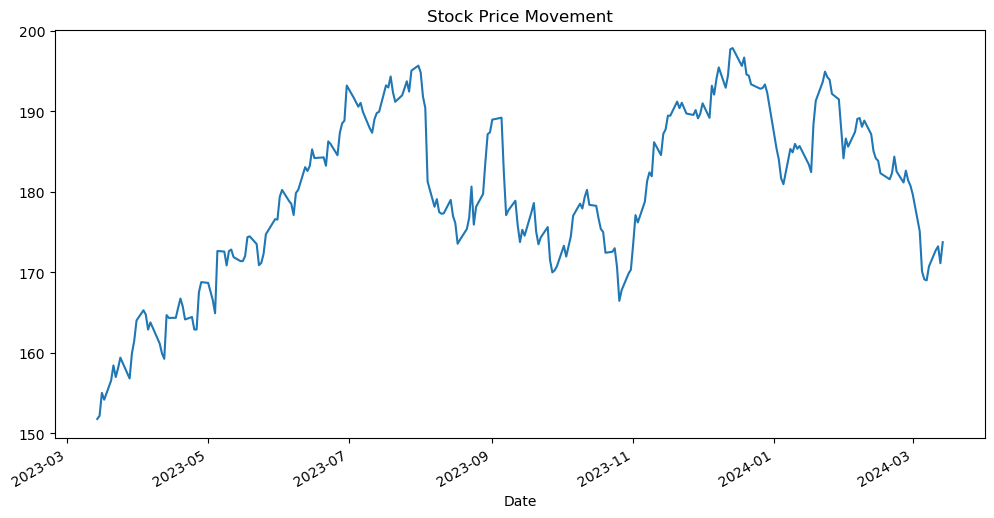

In [8]:
import matplotlib.pyplot as plt

data['Close'].plot(figsize=(12, 6), title="Stock Price Movement")
plt.show()

#### Analyze volume of stocks traded:


Volume indicates the number of shares traded in a given period. High volume can suggest significant news or events affecting the stock.



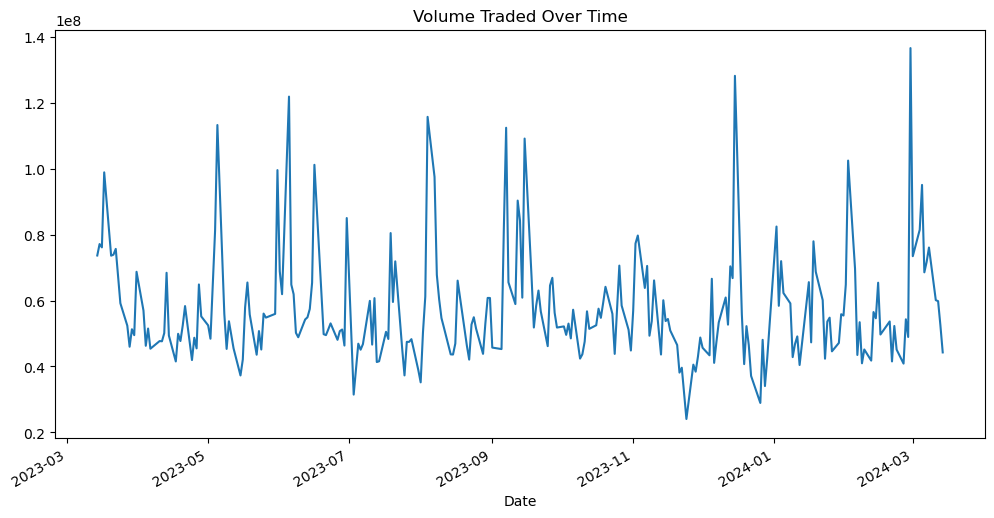

In [9]:
data['Volume'].plot(figsize=(12, 6), title="Volume Traded Over Time")
plt.show()

#### Correlation between stocks:


When analyzing multiple stocks, it's essential to see how they move in relation to one another. A heatmap can visualize this relationship.

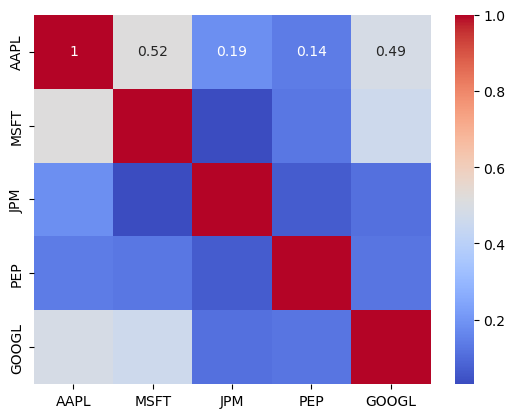

In [10]:
import seaborn as sns

stock_list = ["AAPL", "MSFT", "JPM", "PEP", "GOOGL"]
close_prices = pd.DataFrame()

for stock in stock_list:
   close_prices[stock] = yf.Ticker(stock).history(period="1y")['Close']

correlation = close_prices.pct_change().corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

Note: Correlation values range between -1 and 1. A value closer to 1 implies that two stocks move in tandem, while a value closer to -1 indicates they move in opposite directions.

#### 5. Technical Analysis
Technical analysis involves studying past market data, primarily price and volume, to forecast future price movements. This analysis can be performed on any security with historical trading data.


Moving Averages:

A moving average smoothens price data to create a single flowing line, which makes it easier to identify the direction of the trend. The two most common types of moving averages are the Simple Moving Average (SMA) and the Exponential Moving Average (EMA).

#### Simple Moving Average (SMA):

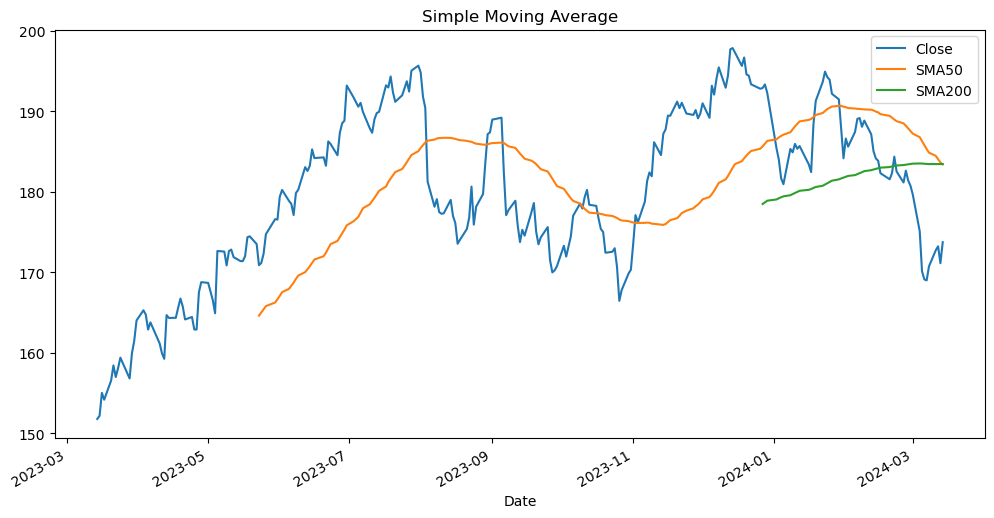

In [11]:
data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

data[['Close', 'SMA50', 'SMA200']].plot(figsize=(12,6))
plt.title('Simple Moving Average')
plt.show()

Note: Here, SMA50 is the 50-day moving average, and SMA200 is the 200-day moving average. When SMA50 crosses above SMA200, it's often seen as a bullish sign, and vice versa.

#### Exponential Moving Average (EMA):

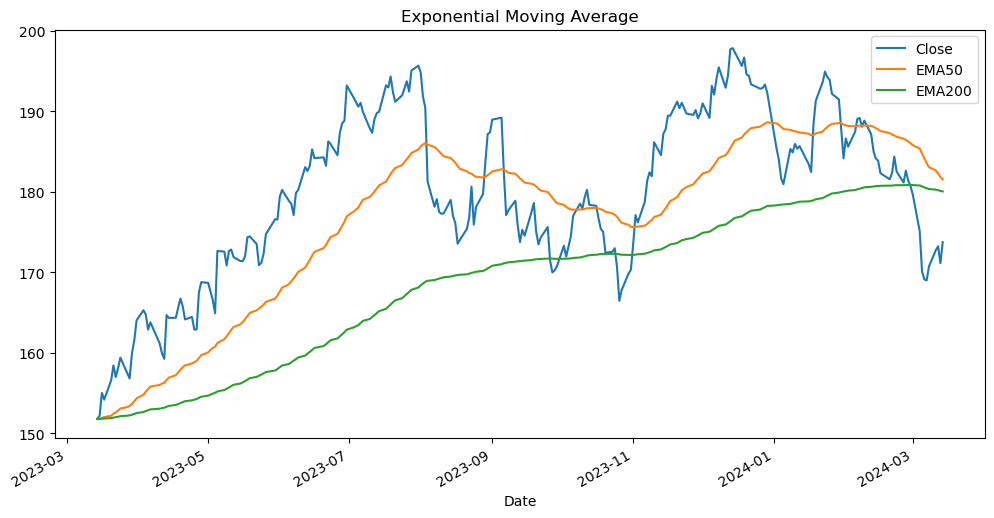

In [12]:
data['EMA50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA200'] = data['Close'].ewm(span=200, adjust=False).mean()

data[['Close', 'EMA50', 'EMA200']].plot(figsize=(12,6))
plt.title('Exponential Moving Average')
plt.show()

Note: EMA gives more weight to recent prices, and therefore reacts more quickly to price changes than SMA.

#### Bollinger Bands:


Bollinger Bands consist of a middle band being an N-period simple moving average (SMA), an upper band at K times an N-period standard deviation above the middle band, and a lower band at K times an N-period standard deviation below the middle band.

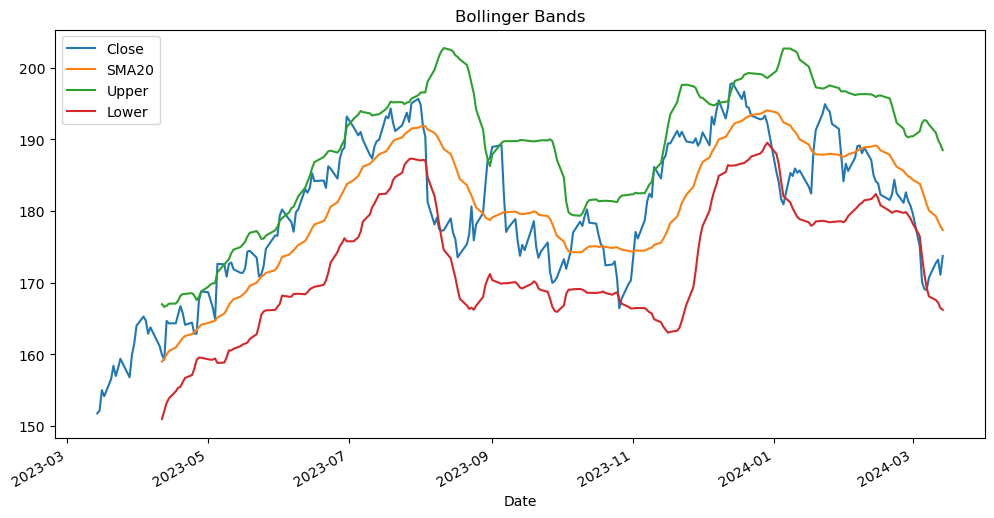

In [13]:
data['SMA20'] = data['Close'].rolling(window=20).mean()
data['Upper'] = data['SMA20'] + 2*data['Close'].rolling(window=20).std()
data['Lower'] = data['SMA20'] - 2*data['Close'].rolling(window=20).std()

data[['Close', 'SMA20', 'Upper', 'Lower']].plot(figsize=(12,6))
plt.title('Bollinger Bands')
plt.show()

Note: Bollinger Bands are used to determine overbought and oversold levels; when the price reaches the upper band, it might be overbought, and when it reaches the lower band, it might be oversold.

#### 6. Time Series Forecasting
Time series forecasting involves predicting future values based on previously observed values.

#### ARIMA Model:

ARIMA stands for AutoRegressive Integrated Moving Average. It is a forecasting method for univariate time series data.

D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


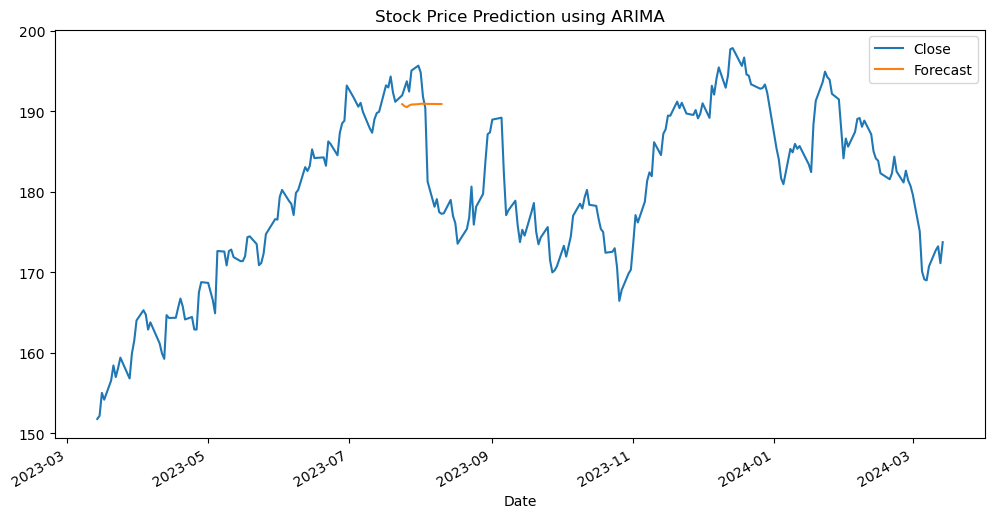

In [16]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(data['Close'], order=(5,1,0))

results = model.fit()

data['Forecast'] = results.predict(start=90, end=103, dynamic=True)


data[['Close', 'Forecast']].plot(figsize=(12,6))

plt.title('Stock Price Prediction using ARIMA')

plt.show()

#### 7. Portfolio Optimization
When dealing with multiple stocks, it's crucial to determine how much of each stock you should hold in your portfolio.


#### Efficient Frontier:

This is a concept from Modern Portfolio Theory. The efficient frontier represents the set of optimal portfolios that offer the highest expected return for a specific level of risk.

In [18]:
from scipy.optimize import minimize
import numpy as np

# Assuming stock_list contains the symbols of the stocks in the portfolio
returns = close_prices.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 10000
risk_free_rate = 0.0178 # example value

# Portfolio optimization function
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
   returns = np.sum(mean_returns*weights ) *252
   std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
   return std, returns

# Minimize negative Sharpe Ratio to get optimal portfolio
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
   p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
   return -(p_ret - risk_free_rate) / p_var

# Constraints for optimization
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

# Running the optimization
initial = [1./len(stock_list) for stock in stock_list]
bounds = tuple((0, 1) for asset in range(len(stock_list)))
result = minimize(neg_sharpe_ratio, initial, args=(mean_returns, cov_matrix, risk_free_rate), bounds=bounds, constraints=constraints)

Note: The above is a simple example of portfolio optimization. There are many other factors and constraints that can be considered.

#### 8. Conclusion


Summarize the insights gathered from the analysis:


Stock price trends over the past year.

Technical indicators and their implications.

Potential investment strategies based on historical data.

Performance of the developed trading strategy.

Remember, the stock market is influenced by a myriad of factors, including economic data, corporate earnings reports, geopolitical events, and others. While historical data provides valuable insights, it's essential to stay updated with current events and adjust strategies accordingly.

#### 9. Challenges & Future Work

Discuss the challenges encountered during the project:


Data inconsistencies or missing values.
Assumptions made during the analysis and their implications.
Limitations of the chosen models and strategies.

Suggest avenues for future exploration:


Incorporating more sophisticated models like neural networks for stock price prediction.

Exploring algorithmic trading strategies using tools like backtrader or QuantConnect.

Integrating real-time data feeds for live trading.

### External Resources

Websites:


<a id = "https://www.investopedia.com/"> Investopedia</a>: A comprehensive resource for all things related to finance and investing. It provides detailed explanations of financial terms and concepts.

<a id = "https://finance.yahoo.com/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAJaz2-8Gliy5wc4o7exxOhp3TTLFGjMCZKGo62AB-qkxcKwd-Fc_LkdeiQt7yJHjbFZppoI8W-0xiLIsAcmNKcDaLu1rAb_L7KD0y-T4RWD5-7g1U74afFX10nV1L2_9tP5zRw2PcbQZhA7wLkutB-TRewnUio42sF4Pf_8LMmt-"> Yahoo Finance</a>: A widely-used platform for checking stock prices, financial news, and historical data. It also offers educational articles and videos.

<a id = "https://stockcharts.com/"> StockCharts.com</a>: A resource for technical analysis enthusiasts. It offers tutorials, articles, and tools for charting and technical analysis.

<a id = "https://www.investopedia.com/terms/m/modernportfoliotheory.asp"> Modern Portfolio Theory (Investopedia)</a>: Learn more about the concept of the Efficient Frontier and Modern Portfolio Theory.



YouTube Channels:


<a id = "https://www.youtube.com/c/ThePlainBagel"> The Plain Bagel</a>: Provides clear explanations of finance and investing concepts, including topics related to stock market analysis.

<a id = "https://www.youtube.com/user/investopediacom"> Investopedia</a>: The official YouTube channel of Investopedia features video explanations of financial terms, strategies, and concepts.

<a id = "https://www.youtube.com/user/ukspreadbetting"> UKspreadbetting</a>: Offers educational content on trading strategies, technical analysis, and market psychology.

Videos:


How the Stock Market Works (Investopedia Video): An introductory video explaining the basics of the stock market.

What is Technical Analysis? (Investopedia Video): Provides an overview of technical analysis and its key components.

<a id = "https://www.youtube.com/watch?v=e8Yw4alG16Q"> Introduction to ARIMA Time Series Forecasting (Data School)</a>: A detailed video tutorial on ARIMA modeling for time series forecasting.

<a id = "https://www.youtube.com/watch?v=ftMq5ps503w"> LSTM Time Series Prediction Example with Keras in Python (Machine Learning Mastery)</a>: A practical guide to implementing LSTM for time series prediction.